<h1><b>Automating Crypto Website API Pull Using Python</b></h1>

In [26]:
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '632b7a0e-40c1-47b3-807a-eb4e19c941ae',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-07-21T07:39:34.428Z', 'error_code': 0, 'error_message': None, 'elapsed': 43, 'credit_count': 1, 'notice': None, 'total_count': 10089}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10353, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [27]:
type(data)

dict

In [47]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [48]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

In [49]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10353,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.943509e+07,1.943509e+07,False,NaN,1,NaN,NaN,None,2023-07-21T07:38:00.000Z,29778.802815,1.468623e+10,9.2655,-0.197466,-0.878413,-4.624531,3.164823,10.877585,8.892812,5.787538e+11,48.2597,6.253549e+11,None,2023-07-21T07:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-21 14:00:37.508043
1,1027,Ethereum,ETH,ethereum,7140,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201951e+08,1.201951e+08,True,NaN,2,NaN,NaN,None,2023-07-21T07:38:00.000Z,1888.994466,7.091071e+09,20.7166,-0.186905,-1.115234,-5.626734,4.244999,4.326418,1.795100,2.270480e+11,18.9289,2.270480e+11,None,2023-07-21T07:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-21 14:00:37.508043
2,825,Tether USDt,USDT,tether,57460,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.381930e+10,8.670779e+10,True,NaN,3,NaN,NaN,None,2023-07-21T07:38:00.000Z,1.000086,2.556553e+10,14.7847,-0.005113,-0.014671,-0.052225,0.016934,-0.008524,-0.034469,8.382650e+10,6.9912,8.671524e+10,None,2023-07-21T07:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-21 14:00:37.508043
3,52,XRP,XRP,xrp,997,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.254409e+10,9.998862e+10,False,NaN,4,NaN,NaN,None,2023-07-21T07:38:00.000Z,0.780106,2.348414e+09,-29.6216,-1.267898,-1.246045,1.195624,57.799455,69.053110,72.363159,4.098994e+10,3.4186,7.801055e+10,None,2023-07-21T07:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-21 14:00:37.508043
4,1839,BNB,BNB,bnb,1525,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538569e+08,1.538569e+08,False,NaN,5,NaN,NaN,None,2023-07-21T07:38:00.000Z,243.272462,4.893434e+08,-35.2065,-0.108276,0.144625,-6.058170,-2.523980,-20.862457,-24.731209,3.742914e+10,3.1217,3.742914e+10,None,2023-07-21T07:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-21 14:00:37.508043
5,3408,USD Coin,USDC,usd-coin,13396,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.691337e+10,2.691337e+10,False,NaN,6,NaN,NaN,None,2023-07-21T07:38:00.000Z,1.000007,3.120107e+09,8.2316,-0.010848,-0.000661,-0.012636,-0.008957,-0.006707,-0.020046,2.691355e+10,2.2446,2.691355e+10,None,2023-07-21T07:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-21 14:00:37.508043
6,2010,Cardano,ADA,cardano,878,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.498672e+10,3.599913e+10,False,NaN,7,NaN,NaN,None,2023-07-21T07:38:00.000Z,0.313223,2.844637e+08,-17.4826,-0.574449,-1.256385,-11.369393,12.341627,-13.883223,-18.962746,1.095866e+10,0.9140,1.409505e+10,None,2023-07-21T07:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-21 14:00:37.508043
7,5426,Solana,SOL,solana,490,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.038680e+08,5.529777e+08,True,NaN,8,NaN,NaN,None,2023-07-21T07:38:00.000Z,25.207879,5.835085e+08,-12.3699,-0.491418,-4.437161,-11.346322,49.492246,27.846622,18.014013,1.018066e+10,0.8488,1.393940e+10,None,2023-07-21T07:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-21 14:00:37.508043
8,74,Dogecoin,DOGE,dogecoin,748,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange,

In [60]:
def api_runner():
    
    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])


    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    if not os.path.isfile(r'C:\Users\77474\Desktop\Python\API.csv'):
        df.to_csv(r'C:\Users\77474\Desktop\Python\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\77474\Desktop\Python\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\77474\Desktop\Python\API.csv')

# If that didn't work try using the local host URL as shown in the video

In [61]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) # slepp for 1 minute
exit()
    

API Runner completed successfully
API Runner completed successfully


KeyboardInterrupt: 

In [98]:
df3 = pd.read_csv(r'C:\Users\77474\Desktop\Python\API.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10353,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19435093.00000,19435093.00000,False,NaN,1,NaN,NaN,NaN,2023-07-21T07:38:00.000Z,29778.80282,14686229973.19392,9.26550,-0.19747,-0.87841,-4.62453,3.16482,10.87758,8.89281,578753802144.44946,48.25970,625354859121.77002,NaN,2023-07-21T07:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-21 14:00:37.508043,NaN
1,1,1027,Ethereum,ETH,ethereum,7140,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120195141.29749,120195141.29749,True,NaN,2,NaN,NaN,NaN,2023-07-21T07:38:00.000Z,1888.99447,7091071018.71890,20.71660,-0.18690,-1.11523,-5.62673,4.24500,4.32642,1.79510,227047956759.18527,18.92890,227047956759.19000,NaN,2023-07-21T07:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-21 14:00:37.508043,NaN
2,2,825,Tether USDt,USDT,tether,57460,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83819295816.65376,86707788905.04649,True,NaN,3,NaN,NaN,NaN,2023-07-21T07:38:00.000Z,1.00009,25565527740.50256,14.78470,-0.00511,-0.01467,-0.05222,0.01693,-0.00852,-0.03447,83826501620.88913,6.99120,86715243028.19000,NaN,2023-07-21T07:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-21 14:00:37.508043,NaN
3,3,52,XRP,XRP,xrp,997,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,52544091958.00000,99988621362.00000,False,NaN,4,NaN,NaN,NaN,2023-07-21T07:38:00.000Z,0.78011,2348413901.61438,-29.62160,-1.26790,-1.24604,1.19562,57.79945,69.05311,72.36316,40989937215.13894,3.41860,78010553970.37000,NaN,2023-07-21T07:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-21 14:00:37.508043,NaN
4,4,1839,BNB,BNB,bnb,1525,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153856870.92667,153856870.92667,False,NaN,5,NaN,NaN,NaN,2023-07-21T07:38:00.000Z,243.27246,489343364.64935,-35.20650,-0.10828,0.14463,-6.05817,-2.52398,-20.86246,-24.73121,37429139818.75636,3.12170,37429139818.76000,NaN,2023-07-21T07:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-21 14:00:37.508043,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,10,3890,Polygon,MATIC,polygon,780,2019-04-28T00:00:00.000Z,"['pos', 'platform', 'enterprise-solutions', 'z...",10000000000.00000,9319469069.28493,10000000000.00000,False,NaN,11,NaN,NaN,NaN,2023-07-21T08:08:00.000Z,0.76103,365223007.20958,9.63650,-0.53125,2.24562,-11.23218,17.29068,-10.95759,-24.87133,7092362411.48807,0.59190,7610264446.14000,NaN,2023-07-21T08:08:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-21 14:10:27.297912
161,11,2,Litecoin,LTC,litecoin,952,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",84000000.00000,73408301.72744,84000000.00000,False,NaN,12,NaN,NaN,NaN,2023-07-21T08:08:00.000Z,92.08515,547345622.30295,17.15240,-0.32694,-1.05579,-8.92225,9.45988,0.97930,7.52437,6759814700.99562,0.56410,7735152857.67000,NaN,2023-07-21T08:08:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-21 14:10:27.297912
162,12,6636,Polkadot,DOT,polkadot-new,536,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1207149341.43782,1336628218.74300,True,NaN,13,NaN,NaN,NaN,2023-07-21T0

In [99]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [100]:
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10353,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19435093.00000,19435093.00000,False,NaN,1,NaN,NaN,NaN,2023-07-21T07:38:00.000Z,29778.80282,14686229973.19392,9.26550,-0.19747,-0.87841,-4.62453,3.16482,10.87758,8.89281,578753802144.44946,48.25970,625354859121.77002,NaN,2023-07-21T07:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-21 14:00:37.508043,NaN
1,1,1027,Ethereum,ETH,ethereum,7140,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120195141.29749,120195141.29749,True,NaN,2,NaN,NaN,NaN,2023-07-21T07:38:00.000Z,1888.99447,7091071018.71890,20.71660,-0.18690,-1.11523,-5.62673,4.24500,4.32642,1.79510,227047956759.18527,18.92890,227047956759.19000,NaN,2023-07-21T07:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-21 14:00:37.508043,NaN
2,2,825,Tether USDt,USDT,tether,57460,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83819295816.65376,86707788905.04649,True,NaN,3,NaN,NaN,NaN,2023-07-21T07:38:00.000Z,1.00009,25565527740.50256,14.78470,-0.00511,-0.01467,-0.05222,0.01693,-0.00852,-0.03447,83826501620.88913,6.99120,86715243028.19000,NaN,2023-07-21T07:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-21 14:00:37.508043,NaN
3,3,52,XRP,XRP,xrp,997,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,52544091958.00000,99988621362.00000,False,NaN,4,NaN,NaN,NaN,2023-07-21T07:38:00.000Z,0.78011,2348413901.61438,-29.62160,-1.26790,-1.24604,1.19562,57.79945,69.05311,72.36316,40989937215.13894,3.41860,78010553970.37000,NaN,2023-07-21T07:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-21 14:00:37.508043,NaN
4,4,1839,BNB,BNB,bnb,1525,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153856870.92667,153856870.92667,False,NaN,5,NaN,NaN,NaN,2023-07-21T07:38:00.000Z,243.27246,489343364.64935,-35.20650,-0.10828,0.14463,-6.05817,-2.52398,-20.86246,-24.73121,37429139818.75636,3.12170,37429139818.76000,NaN,2023-07-21T07:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-21 14:00:37.508043,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,10,3890,Polygon,MATIC,polygon,780,2019-04-28T00:00:00.000Z,"['pos', 'platform', 'enterprise-solutions', 'z...",10000000000.00000,9319469069.28493,10000000000.00000,False,NaN,11,NaN,NaN,NaN,2023-07-21T08:08:00.000Z,0.76103,365223007.20958,9.63650,-0.53125,2.24562,-11.23218,17.29068,-10.95759,-24.87133,7092362411.48807,0.59190,7610264446.14000,NaN,2023-07-21T08:08:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-21 14:10:27.297912
161,11,2,Litecoin,LTC,litecoin,952,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",84000000.00000,73408301.72744,84000000.00000,False,NaN,12,NaN,NaN,NaN,2023-07-21T08:08:00.000Z,92.08515,547345622.30295,17.15240,-0.32694,-1.05579,-8.92225,9.45988,0.97930,7.52437,6759814700.99562,0.56410,7735152857.67000,NaN,2023-07-21T08:08:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-21 14:10:27.297912
162,12,6636,Polkadot,DOT,polkadot-new,536,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1207149341.43782,1336628218.74300,True,NaN,13,NaN,NaN,NaN,2023-07-21T0

In [101]:
df3.columns

Index(['Unnamed: 0', 'id', 'name', 'symbol', 'slug', 'num_market_pairs',
       'date_added', 'tags', 'max_supply', 'circulating_supply',
       'total_supply', 'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'timestamp', 'Timestamp'],
      dtype='object')

In [102]:
df8 = df3 # save copy
df3 = df3.groupby('name', sort = False)[['quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.24055,-0.73500,-4.46794,3.15830,10.83632,9.10076
Ethereum,-0.19066,-0.98367,-5.28654,4.32269,4.18600,2.02159
Tether USDt,-0.00756,-0.01138,-0.03416,0.01352,-0.00417,-0.02095
XRP,-0.91656,-1.15129,0.87642,57.13660,68.82709,72.65572
BNB,-0.02475,0.41809,-5.17036,-2.26015,-20.81357,-24.53293
USD Coin,-0.00667,0.00329,0.00914,-0.00664,0.00474,-0.01442
Cardano,-0.67364,-1.07095,-11.44038,12.35439,-13.97830,-18.94265
Solana,-0.52917,-3.86025,-12.13145,49.85740,27.78198,18.32430
Dogecoin,-0.99520,3.41204,1.66916,10.84432,-0.53657,-9.55554


In [103]:
df4 = df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h     -0.24055
           quote.USD.percent_change_24h    -0.73500
           quote.USD.percent_change_7d     -4.46794
           quote.USD.percent_change_30d     3.15830
           quote.USD.percent_change_60d    10.83632
                                             ...   
Avalanche  quote.USD.percent_change_24h    -0.68381
           quote.USD.percent_change_7d     -9.55713
           quote.USD.percent_change_30d    13.12366
           quote.USD.percent_change_60d    -3.19896
           quote.USD.percent_change_90d   -18.21280
Length: 90, dtype: float64

In [104]:
df5 = df4.to_frame(name='values')
df5

values
name                                            
Bitcoin   quote.USD.percent_change_1h   -0.24055
          quote.USD.percent_change_24h  -0.73500
          quote.USD.percent_change_7d   -4.46794
          quote.USD.percent_change_30d   3.15830
          quote.USD.percent_change_60d  10.83632
...                                          ...
Avalanche quote.USD.percent_change_24h  -0.68381
          quote.USD.percent_change_7d   -9.55713
          quote.USD.percent_change_30d  13.12366
          quote.USD.percent_change_60d  -3.19896
          quote.USD.percent_change_90d -18.21280

[90 rows x 1 columns]

In [105]:
df5.count()

values    90
dtype: int64

In [106]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.24055
1,Bitcoin,quote.USD.percent_change_24h,-0.73500
2,Bitcoin,quote.USD.percent_change_7d,-4.46794
3,Bitcoin,quote.USD.percent_change_30d,3.15830
4,Bitcoin,quote.USD.percent_change_60d,10.83632
...,...,...,...
85,Avalanche,quote.USD.percent_change_24h,-0.68381
86,Avalanche,quote.USD.percent_change_7d,-9.55713
87,Avalanche,quote.USD.percent_change_30d,13.12366
88,Avalanche,quote.USD.percent_change_60d,-3.19896


In [107]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.24055
1,Bitcoin,quote.USD.percent_change_24h,-0.73500
2,Bitcoin,quote.USD.percent_change_7d,-4.46794
3,Bitcoin,quote.USD.percent_change_30d,3.15830
4,Bitcoin,quote.USD.percent_change_60d,10.83632
...,...,...,...
85,Avalanche,quote.USD.percent_change_24h,-0.68381
86,Avalanche,quote.USD.percent_change_7d,-9.55713
87,Avalanche,quote.USD.percent_change_30d,13.12366
88,Avalanche,quote.USD.percent_change_60d,-3.19896


In [108]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.24055
1,Bitcoin,24h,-0.73500
2,Bitcoin,7d,-4.46794
3,Bitcoin,30d,3.15830
4,Bitcoin,60d,10.83632
...,...,...,...
85,Avalanche,24h,-0.68381
86,Avalanche,7d,-9.55713
87,Avalanche,30d,13.12366
88,Avalanche,60d,-3.19896


In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

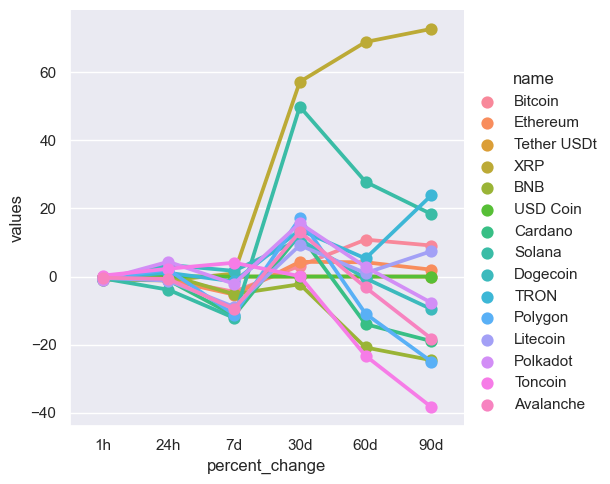

In [110]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [112]:
df9 = df8[['name', 'quote.USD.price', 'timestamp']]
df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,29778.80282,2023-07-21 14:00:37.508043
15,Bitcoin,29764.40807,NaN
30,Bitcoin,29771.57665,NaN
45,Bitcoin,29784.13870,NaN
60,Bitcoin,29784.31068,NaN
75,Bitcoin,29778.80282,2023-07-21 14:00:37.508043
90,Bitcoin,29764.40807,NaN
105,Bitcoin,29771.57665,NaN
120,Bitcoin,29784.13870,NaN
135,Bitcoin,29784.31068,NaN


<Axes: xlabel='last_updated', ylabel='quote.USD.price'>

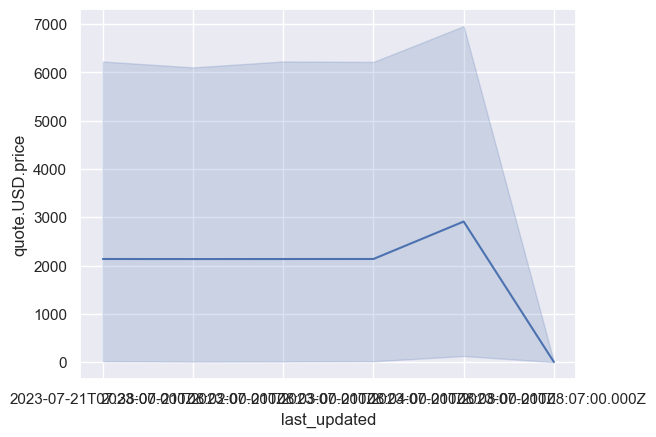

In [120]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='last_updated', y='quote.USD.price', data=df)
# need to reformat date format as we did on the quote.USD.percent_change above